# Simulated image

In [1]:
from prose.tutorials import example_image

WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


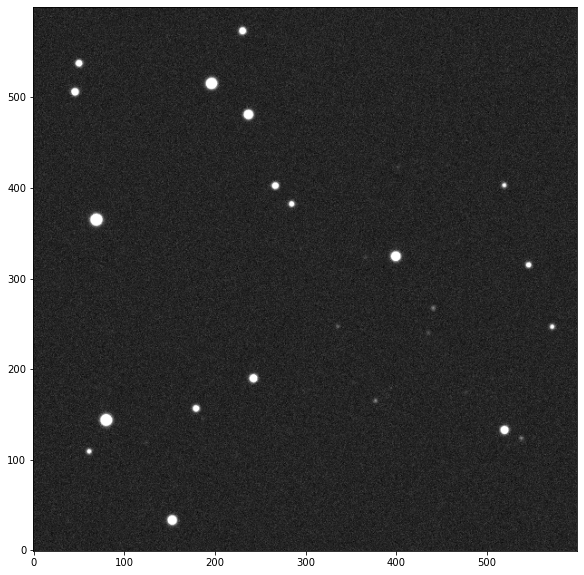

In [2]:
image = example_image()
image.show()

# Blocks

In [3]:
from prose import blocks

## Trim

In [4]:
from prose import blocks
from prose.tutorials import example_image

# our example image
image = example_image()

# Creating and applying the Trim block
trim = blocks.Trim(trim=100)
trimmed_image = trim(image)

Text(0.0, 1.0, 'trimmed image')

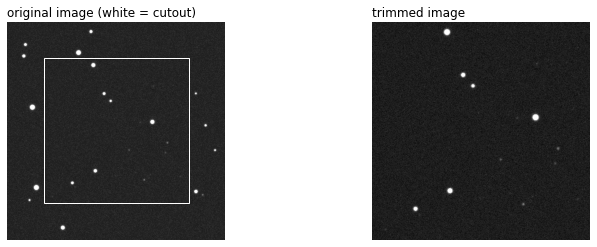

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

ax1 = plt.subplot(121)
image.show(ax=ax1)
trim.draw_cutout(image)
plt.axis("off")
plt.title("original image (white = cutout)", loc="left")

ax2 = plt.subplot(122)
trimmed_image.show(ax=ax2)
plt.axis("off")
plt.title("trimmed image", loc="left")

## FWHM



In [15]:
from prose import blocks, Sequence
from prose.tutorials import example_image

# our example image
image = example_image()

# Sequence to build image PSF
sequence = Sequence([
    blocks.SegmentedPeaks(),  # stars detection
    blocks.Cutouts(),
    blocks.MedianPSF(),       # building PSF
])

sequence.run([image])

RUN default: 100%|████████████████████████████| 1/1 [00:00<00:00, 77.75images/s]


In [18]:
import matplotlib.pyplot as plt

block = blocks.FWHM()
image = block(image)

## Gaussian2D

In [8]:
from prose import blocks, Sequence
from prose.tutorials import example_image

# our example image
image = example_image()

# Sequence to build image PSF
sequence = Sequence([
    blocks.SegmentedPeaks(),  # stars detection
    blocks.Cutouts(),
    blocks.MedianPSF(),       # building PSF
])

sequence.run([image])

RUN default: 100%|████████████████████████████| 1/1 [00:00<00:00, 78.26images/s]


In [9]:
import matplotlib.pyplot as plt

block = blocks.Gaussian2D()
image = block(image)

model: Gaussian2D
fwhmx, fwhmy, theta: 3.63, 3.35, 0.00


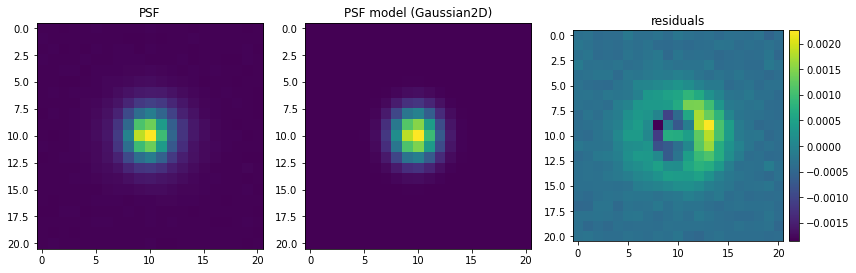

In [10]:
from prose import viz

print(f"model: {image.psf_model_block}")
print("fwhmx, fwhmy, theta: " + ", ".join([f"{p:.2f}" for p in block.fwhm(image.psf_models_params)]))

plt.figure(figsize=(12, 5))

plt.subplot(131)
plt.imshow(image.psf)
plt.title("PSF")

plt.subplot(132)
plt.imshow(image.psf_model)
plt.title(f"PSF model ({image.psf_model_block})")

plt.subplot(133)
residuals = image.psf - image.psf_model
ax = plt.imshow(residuals)
plt.title("residuals")
viz.add_colorbar(ax)

plt.tight_layout()

model: Gaussian2D
fwhmx, fwhmy, theta: 3.63, 3.35, 0.00


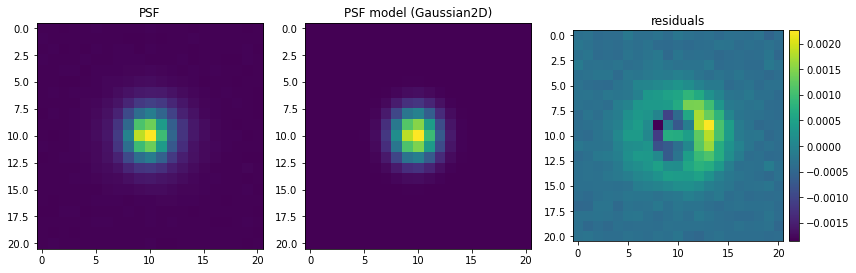

In [10]:
from prose import viz

print(f"model: {image.psf_model_block}")
print("fwhmx, fwhmy, theta: " + ", ".join([f"{p:.2f}" for p in block.fwhm(image.psf_models_params)]))

plt.figure(figsize=(12, 5))

plt.subplot(131)
plt.imshow(image.psf)
plt.title("PSF")

plt.subplot(132)
plt.imshow(image.psf_model)
plt.title(f"PSF model ({image.psf_model_block})")

plt.subplot(133)
residuals = image.psf - image.psf_model
ax = plt.imshow(residuals)
plt.title("residuals")
viz.add_colorbar(ax)

plt.tight_layout()

## Moffat2D

In [11]:
from prose import blocks, Sequence
from prose.tutorials import example_image

# our example image
image = example_image()

# Sequence to build image PSF
sequence = Sequence([
    blocks.SegmentedPeaks(),  # stars detection
    blocks.Cutouts(),
    blocks.MedianPSF(),       # building PSF
])

sequence.run([image])

RUN default: 100%|████████████████████████████| 1/1 [00:00<00:00, 76.21images/s]


In [12]:
import matplotlib.pyplot as plt

block = blocks.Moffat2D()
image = block(image)

model: Moffat2D
fwhmx, fwhmy, theta: 2.67, 2.46, 0.00


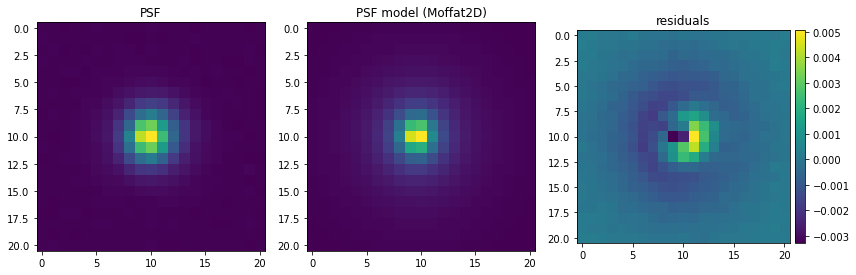

In [13]:
from prose import viz

print(f"model: {image.psf_model_block}")
print("fwhmx, fwhmy, theta: " + ", ".join([f"{p:.2f}" for p in block.fwhm(image.psf_models_params)]))

plt.figure(figsize=(12, 5))

plt.subplot(131)
plt.imshow(image.psf)
plt.title("PSF")

plt.subplot(132)
plt.imshow(image.psf_model)
plt.title(f"PSF model ({image.psf_model_block})")

plt.subplot(133)
residuals = image.psf - image.psf_model
ax = plt.imshow(residuals)
plt.title("residuals")
viz.add_colorbar(ax)

plt.tight_layout()

# Telescope

In [ ]:
from prose import Telescope

telescope_dict = dict(
    # Name(s)
    # -------
    name = "Unknown",
    names = [],

    # Keywords
    # --------
    keyword_telescope = "TELESCOP",
    keyword_object = "OBJECT",
    keyword_image_type = "IMAGETYP",
    keyword_light_images = "light",
    keyword_dark_images = "dark",
    keyword_flat_images = "flat",
    keyword_bias_images = "bias",
    keyword_observation_date = "DATE-OBS",
    keyword_exposure_time = "EXPTIME",
    keyword_filter = "FILTER",
    keyword_airmass = "AIRMASS",
    keyword_fwhm = "FWHM",
    keyword_seeing = "SEEING",
    keyword_ra = "RA",
    keyword_dec = "DEC",
    keyword_jd = "JD",
    keyword_bjd = "BJD",
    keyword_flip = "PIERSIDE",
    keyword_observation_time = None,

    # Units, formats and scales
    # -------------------------
    ra_unit = "deg",
    dec_unit = "deg",
    jd_scale = "utc",
    bjd_scale = "utc",
    mjd = 0,
    
    # Specs
    # -----
    trimming = (0, 0), # in piwel along y/x
    read_noise = 9, # in A
    gain = 1, # in e-/ADU
    altitude = 2000, # in meters
    diameter = 100, # in meters
    pixel_scale = None, # in arcseconds
    latlong = [None, None], 
    saturation = 55000,
    hdu = 0
)

telescope = Telescope(telescope_dict)